# Jonathan Bradley - CS 4319 - 4/30/2021

In [33]:
# libraries 
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

#Visualizers
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve
import matplotlib.pyplot as plt

#Metrics
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import log_loss
from sklearn.metrics import zero_one_loss
from sklearn.metrics import matthews_corrcoef
#Classifiers
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier



import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r"C:\Users\jonat\Desktop\school\Spring 2021\CS 4319 - Machine Learning\Glioblastoma_5Class\Data_Glioblastoma5Patients_SC.csv")

In [3]:
data

,A2M,AAAS,AAK1,AAMP,AARS,AARSD1,AASDH,AASDHPPT,AASS,AATF,...,ZSWIM6,ZSWIM7,ZUFSP,ZW10,ZWILCH,ZXDC,ZYG11B,ZYX,ZZZ3,Classes
0,-3.801470,-3.889900,-3.985616,2.651558,2.170748,-2.550822,4.807330,3.961170,-0.192665,3.614482,...,2.909466,-3.118284,-1.538324,-1.550699,-1.558581,-1.920271,3.007439,-2.509017,-2.149696,Class1
1,-3.801470,-3.889900,-3.158708,2.358992,-6.041792,-0.056092,3.606735,-2.632250,2.249388,6.857517,...,-1.821098,-3.118284,-1.538324,-1.550699,-1.558581,-3.068620,2.539560,2.164481,-2.149696,Class1
2,-3.801470,-3.889900,1.733125,-5.820241,-6.041792,-0.576957,-2.473517,-4.354127,0.063178,-2.570976,...,-1.821098,5.521892,-1.538324,-1.550699,-1.558581,0.174665,-0.165409,0.734268,-2.149696,Class1
3,-3.801470,-3.889900,-1.665669,3.514271,-6.041792,-3.699171,4.509461,-4.354127,2.985972,-2.570976,...,4.952176,-0.854351,-1.538324,-1.550699,-1.558581,-3.068620,-1.884744,-2.509017,-2.149696,Class1
4,-3.801470,3.742495,-2.166992,-5.820241,2.094729,4.021873,5.535007,4.019633,2.560370,-2.570976,...,-1.821098,4.328808,-1.538324,7.021985,-1.558581,4.590946,-0.128456,-2.509017,-2.149696,Class1
5,-1.987700,-3.889900,4.691156,-4.006471,-3.449348,4.309767,4.002960,5.123457,0.341512,-2.570976,...,4.176419,-2.370500,-1.538324,-1.550699,-1.558581,-3.068620,-3.421540,-2.509017,-2.149696,Class1
6,-3.801470,-3.889900,2.656469,2.207608,-6.041792,4.235937,0.716257,-1.164354,2.630053,-2.570976,...,-1.821098,0.071490,-1.538324,5.651368,-1.558581,3.617386,1.384471,-2.509017,-2.149696,Class1
7,-3.801470,-3.889900,-1.914759,2.417820,3.162904,-3.699171,-2.473517,-4.354127,1.970206,-2.570976,...,-1.821098,3.615788,-1.538324,-1.550699,-1.558581,1.829214,5.237998,-2.509017,6.779879,Class1
8,-3.801470,-3.889900,0.483560,-5.820241,-6.041792,-3.699171,-2.473517,4.889074,-3.847544,-2.570976,...,-1.821098,-3.118284,-1.538324,-1.550699,-1.558581,-3.068620,-0.775154,1.953289,-2.149696,Class1
9,-3.801470,4.316243,1.828663,2.140173,-6.041792,3.721094,3.479903,-4.354127,-4.860593,-2.570976,...,-1.821098,-0.860025,0.841462,-1.550699,-1.558581,5.157919,4.710859,5.078266,4.977025,Class1


In [4]:
data['Classes'].value_counts()

Class1    118
Class2     94
Class3     75
Class4     73
Class5     70
Name: Classes, dtype: int64

In [6]:
X = data.drop(['Classes'],axis=1)
y = data['Classes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [7]:
classes = ["Class1", "Class2", "Class3", "Class4", "Class5"]

In [8]:
# select classifiers 

classifiers=[
KNeighborsClassifier(n_neighbors = 7),
LogisticRegression(random_state=0, multi_class='multinomial', solver='newton-cg'),
RandomForestClassifier(min_samples_split=3, n_estimators=250, random_state=42),
svm.SVC()]

In [9]:
#Write function for class-centric metrics
# Classification report
def CR_viz():
    def Class_report(model,classes):
        visualizer = ClassificationReport(model, classes=classes, support=True)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        return visualizer.poof()
    for name in classifiers:
        ax = plt.subplot(1,1,1)
        Class_report(name,classes)

#Class Prediction Error
def CPE_viz():    
    def CPE(model,classes):
        visualizer = ClassPredictionError(model, classes=classes)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
        return visualizer.poof()  
    for name in classifiers:
        ax = plt.subplot(1,1,1)
        CPE(name,classes)
        
#Confusion matrix
def CM_viz():    
    def CM(model,classes):
        visualizer = ConfusionMatrix(model, classes=classes,percent=True)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
        return visualizer.poof()  
    for name in classifiers:
        ax = plt.subplot(1,1,1)
        CM(name,classes)
        
#ROC-AUC
def ROC_viz():    
    def ROC(model,classes):
        visualizer = ROCAUC(model, classes=classes)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
        return visualizer.poof()  
    for name in classifiers:
        ax = plt.subplot(1,1,1)
        ROC(name,classes)

#Precision Recall Curve
def PRC_viz():  
    def PRC(model,classes):
        visualizer = PrecisionRecallCurve(model,classes=classes, per_class=True, iso_f1_curves=False,
    fill_area=False, micro=False)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
        return visualizer.poof()  
    for name in classifiers:
        ax = plt.subplot(1,1,1)
        PRC(name,classes)


In [10]:
# Write function for aggregate metrics
def classifier_metrics():    
    def metrics(model):
        #     model=model_name()
        model.fit(X_train, y_train)  # Fit the visualizer and the model
        y_pred = model.predict(X_test)
        try: 
            y_prob = model.predict_proba(X_test)
            log_metric = log_loss(y_test,y_prob)
        except:
            y_prob = "Not probablistic"
            log_metric = 0
        else:
            y_pred = model.predict(X_test)
        c_k_s=cohen_kappa_score(y_test,y_pred)
        zero_met=zero_one_loss(y_test,y_pred)
        hl=hamming_loss(y_test,y_pred)
        mc=matthews_corrcoef(y_test,y_pred)
        print('cohen_kappa_score: {0:.3f}'.format(c_k_s))
        print('log_loss: {0:.3f}'.format(log_metric))
        print('zero_one_loss: {0:.3f}'.format(zero_met))
        print('hemming_loss: {0:.3f}'.format(hl))
        print('matthews_corrcoef: {0:.3f}'.format(mc))
    for name in classifiers:
        print (str(name))
        metrics(name)
        print()
        print ("------------------------------------------------------")

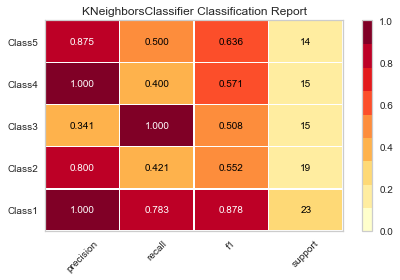

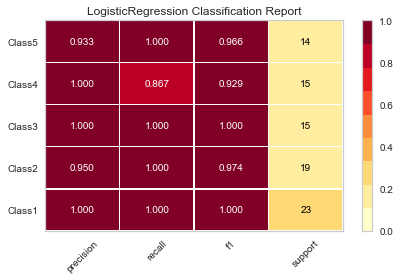

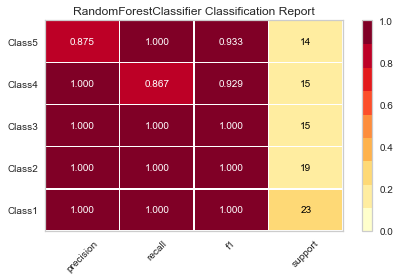

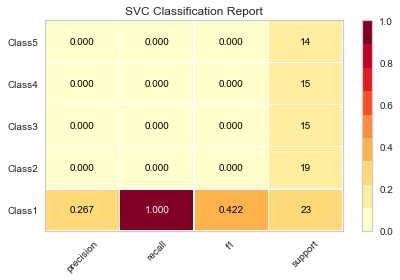

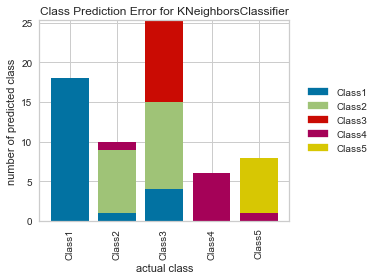

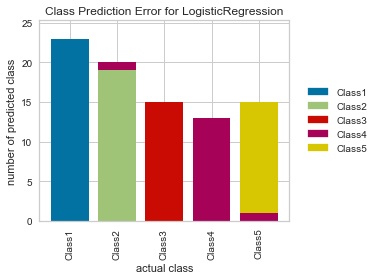

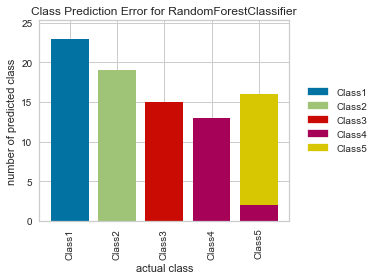

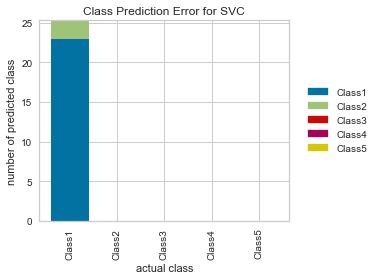

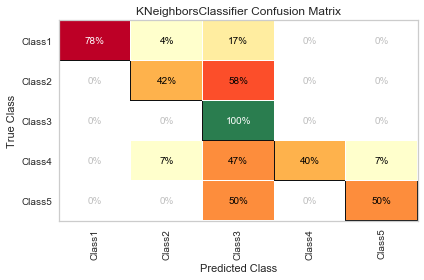

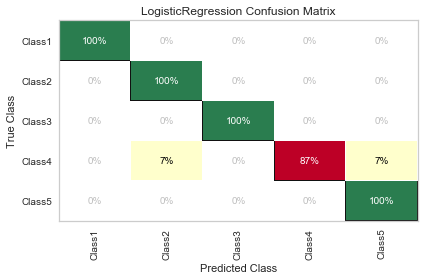

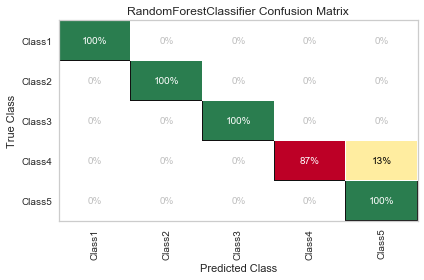

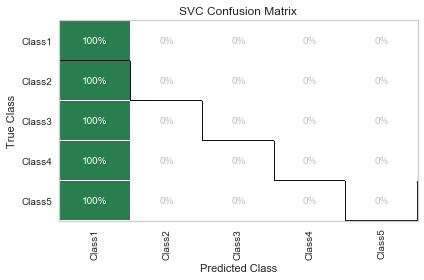

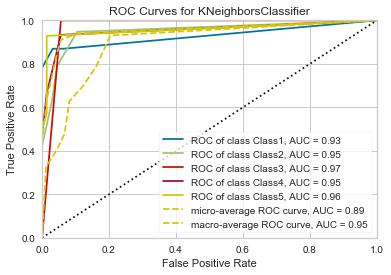

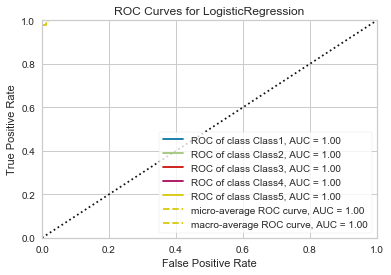

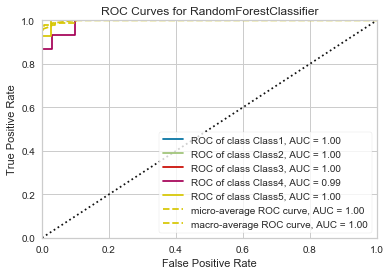

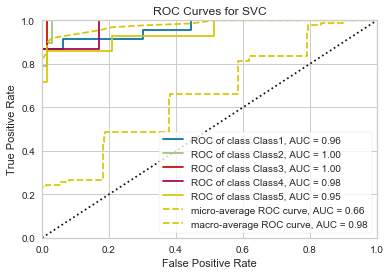

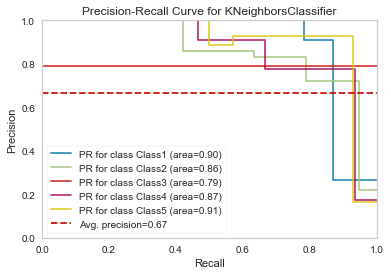

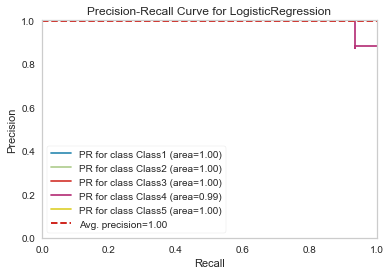

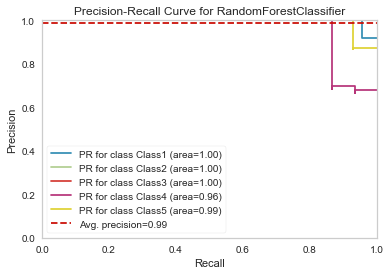

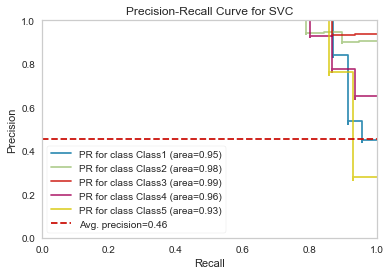

In [11]:
#deploy visualization
visualization =[CR_viz(),CPE_viz(),CM_viz(),ROC_viz(),PRC_viz()]

In [12]:
#Deploy aggregate metrics  
classifier_metrics()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')
cohen_kappa_score: 0.536
log_loss: 2.980
zero_one_loss: 0.372
hemming_loss: 0.372
matthews_corrcoef: 0.591

------------------------------------------------------
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)
cohen_kappa_score: 0.971
log_loss: 0.061
zero_one_loss: 0.023
hemming_loss: 0.023
matthews_corrcoef: 0.971

------------------------------------------------------
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=No

Optimizing LR

In [17]:
#Optimize LR

param_grid = {'C': [.001, .01, .1, 1, 10, 100, 1000]}
lr = LogisticRegression()
grid = GridSearchCV(lr, param_grid, cv = 3, scoring = 'accuracy')
grid_fitted_LR = grid.fit(X_train, y_train)
print(grid_fitted_LR.best_params_)
print("LR Accuracy: " + str(grid_fitted_LR.best_score_))

{'C': 0.001}
LR Accuracy: 0.9883720930232558


In [18]:
y_predict_lr_opt = grid_fitted_LR.best_estimator_.predict(X_test)
print(classification_report(y_test, y_predict_lr_opt))

              precision    recall  f1-score   support

      Class1       1.00      0.96      0.98        23
      Class2       1.00      0.95      0.97        19
      Class3       1.00      1.00      1.00        15
      Class4       1.00      0.87      0.93        15
      Class5       0.78      1.00      0.88        14

    accuracy                           0.95        86
   macro avg       0.96      0.95      0.95        86
weighted avg       0.96      0.95      0.96        86



In [36]:
#after optimizing Logistic Regression, the model produced an accuracy score
#of .95.

Optimizing RF

In [20]:
#Optimize RF

param_grid = {'max_features': [1,2,3,4,5],
              'n_estimators': [1,2,3,5,6,10],
              'min_samples_leaf': [10,20,30,45,50,60]}

RFC = RandomForestClassifier()
grid = GridSearchCV(RFC, param_grid, cv = 3)
grid_fitted_RFC = grid.fit(X_train, y_train)
print(grid_fitted_RFC.best_params_)
print("RFC Accuracy: " + str(grid_fitted_RFC.best_score_))

{'max_features': 5, 'min_samples_leaf': 20, 'n_estimators': 10}
RFC Accuracy: 0.6540697674418605


In [21]:
grid_fitted_RFC.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [22]:
RGCOpt = grid_fitted_RFC.best_estimator_
y_pred = RGCOpt.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Class1       0.51      0.91      0.66        23
      Class2       0.60      0.79      0.68        19
      Class3       1.00      0.93      0.97        15
      Class4       1.00      0.20      0.33        15
      Class5       0.67      0.14      0.24        14

    accuracy                           0.64        86
   macro avg       0.76      0.60      0.57        86
weighted avg       0.73      0.64      0.59        86



In [40]:
#aftet optimizing Random Forest, the model produced an accuracy score of .64
#which is not good. The worst tested in this program.

Optimizing DT

In [26]:
#Optimize DT

param_grid = {'max_depth': [2,3,4,5,6,7],
              'min_samples_leaf' : [2, 20, 50, 70],
              'max_leaf_nodes' : [5,9,15,21,27]}

DTC = DecisionTreeClassifier()
grid = GridSearchCV(DTC, param_grid, cv = 3)
grid_fitted_DTC = grid.fit(X_train, y_train)
print(grid_fitted_DTC.best_params_)
print("RFC Accuracy: " + str(grid_fitted_DTC.best_score_))

{'max_depth': 5, 'max_leaf_nodes': 15, 'min_samples_leaf': 2}
RFC Accuracy: 0.9069767441860465


In [27]:
grid_fitted_DTC.best_estimator_
DTCOpt = grid_fitted_DTC.best_estimator_

y_predict_DTC_opt = DTCOpt.predict(X_test)
print(classification_report(y_test, y_predict_DTC_opt))

              precision    recall  f1-score   support

      Class1       1.00      1.00      1.00        23
      Class2       0.90      0.95      0.92        19
      Class3       0.88      0.93      0.90        15
      Class4       0.60      0.80      0.69        15
      Class5       0.86      0.43      0.57        14

    accuracy                           0.85        86
   macro avg       0.85      0.82      0.82        86
weighted avg       0.86      0.85      0.84        86



In [38]:
#after optimizing Decision Tree, the model produced an accuracy score of .85
#which is decent but not the best

Optimizing SVM

In [29]:
#Optimize SVM

param_grid =param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
             'kernel' : ['linear']} 

clf = svm.SVC()
grid = GridSearchCV(clf, param_grid, refit = True, verbose = 3)
grid_fitted_SVM = grid.fit(X_train, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....... C=0.1, gamma=1, kernel=linear, score=1.000, total=   1.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.974, total=   1.1s
[CV] C=0.1, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.0s remaining:    0.0s


[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.991, total=   1.1s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=1.000, total=   1.1s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.974, total=   1.2s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.991, total=   1.1s
[CV] C=0.1, gamma=0.01, kernel=linear ................................
[CV] .... C=0.1, gamma=0.01, kernel=linear, score=1.000, total=   1.1s
[CV] C=0.1, gamma=0.01, kernel=linear ................................
[CV] .... C=0.1, gamma=0.01, kernel=linear, score=0.974, total=   1.0s
[CV] C=0.1, gamma=0.01, kernel=linear ................................
[CV] .... C=0.1, gamma=0.01, kernel=linear, score=0.991, total=   1.1s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV] .

[CV] ...... C=1000, gamma=1, kernel=linear, score=1.000, total=   0.9s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ...... C=1000, gamma=1, kernel=linear, score=0.974, total=   0.9s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ...... C=1000, gamma=1, kernel=linear, score=0.991, total=   0.9s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV] .... C=1000, gamma=0.1, kernel=linear, score=1.000, total=   0.9s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV] .... C=1000, gamma=0.1, kernel=linear, score=0.974, total=   0.9s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV] .... C=1000, gamma=0.1, kernel=linear, score=0.991, total=   0.9s
[CV] C=1000, gamma=0.01, kernel=linear ...............................
[CV] ... C=1000, gamma=0.01, kernel=linear, score=1.000, total=   0.9s
[CV] C=1000, gamma=0.01, kernel=linear ...............................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  1.2min finished


In [30]:
print(grid.best_params_)

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}


In [31]:
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

      Class1       1.00      1.00      1.00        23
      Class2       0.95      1.00      0.97        19
      Class3       1.00      1.00      1.00        15
      Class4       1.00      0.87      0.93        15
      Class5       0.93      1.00      0.97        14

    accuracy                           0.98        86
   macro avg       0.98      0.97      0.97        86
weighted avg       0.98      0.98      0.98        86



In [1]:
#after the optimizing SVM, the model produced an accuracy score of .98
#which is great. The best tested in this program.

Optimizing MLP

In [34]:
rf_params = {
'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
'activation': ['tanh', 'relu'],
'solver': ['adam'],
'alpha': [0.1, 0.05],
'learning_rate': ['constant','adaptive']
}
clf = MLPClassifier()
grid = GridSearchCV(clf, rf_params, cv=3, scoring='accuracy')
grid.fit(X_train,y_train)
print(grid.best_params_)
print("MLP Accurracy: "+ str(grid.best_score_))

{'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}
MLP Accurracy: 0.9854651162790697


In [35]:
MLP_opt = grid.best_estimator_.predict(X_test)
print(classification_report(y_test, MLP_opt))

              precision    recall  f1-score   support

      Class1       1.00      0.96      0.98        23
      Class2       1.00      0.95      0.97        19
      Class3       1.00      1.00      1.00        15
      Class4       1.00      0.87      0.93        15
      Class5       0.78      1.00      0.88        14

    accuracy                           0.95        86
   macro avg       0.96      0.95      0.95        86
weighted avg       0.96      0.95      0.96        86



In [ ]:
#after optimizing MLP, the model produced an accuracy score of .95 which
#is great. 